#Regression

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import warnings

warnings.filterwarnings('ignore')



---



###This task is prepared and completed by:


Student Name: **Nayanika Dubey**

University ID: **2408008**

Herald Student ID: **230377**



---



#Regression Task

This task consists of predicting the values of the dependent variable's value for individuals with available information on explanatory variables or assessing the influence of a specific explanatory variable on the dependent variable

I will be working on the dataset **Global Data on Sustainable Energy** which can be found on Kaggle at the following url:

https://www.kaggle.com/datasets/khojiakbarrustamov/global-data-on-sustainable-energy-consumption















### Problem Statement:
In this task I will attempt to build, fit, train and evaluate a linear regression model from scratch. Furthermore, I will use various libraries and prebuild models to do a comparative study between model performances.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [52]:
path = "/content/drive/MyDrive/CTAI Assessment/sustainable-energy.csv"

In [53]:
df = pd.read_csv(path)

### Basic Data Preprocessing and Visualization

In [54]:
# Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75    

In [55]:
# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity

In [56]:
# Defining two variables to store the values returned by .shape()
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 3649
Number of columns: 21


In [57]:
# Using .dtypes to check datatypes
print("Colums and their data types are as follows: ")
print(df.dtypes)

Colums and their data types are as follows: 
Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (M

In [58]:
# Display basic stats of the dataset
print("Dataset Details:")
print(df.describe())

Dataset Details:
              Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-e

In [59]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country 

In [60]:
# Fill or drop missing values (example: using mean for numerical columns)
for column in df.select_dtypes(include=np.number).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

# Fill or drop missing categorical values (example: using mode)
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                         

In [61]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(df.head())


Data after basic cleaning:
        entity  year  access_to_electricity_(%_of_population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   access_to_clean_fuels_for_cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                            

#### Visualization

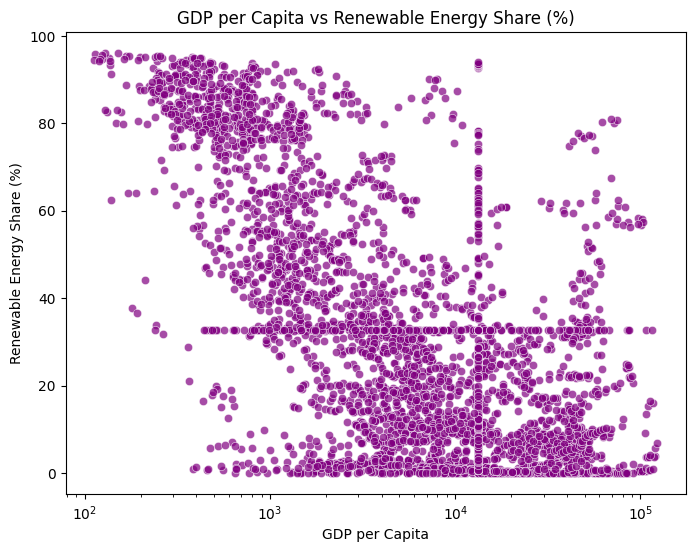

In [62]:
# GDP per Capita vs Renewable Energy Share
plt.figure(figsize=(8, 6))
sns.scatterplot( x='gdp_per_capita', y='renewable_energy_share_in_the_total_final_energy_consumption_(%)', data=df, alpha=0.7, color='purple')
plt.title('GDP per Capita vs Renewable Energy Share (%)')
plt.xlabel('GDP per Capita')
plt.ylabel('Renewable Energy Share (%)')
plt.xscale('log')
plt.show()

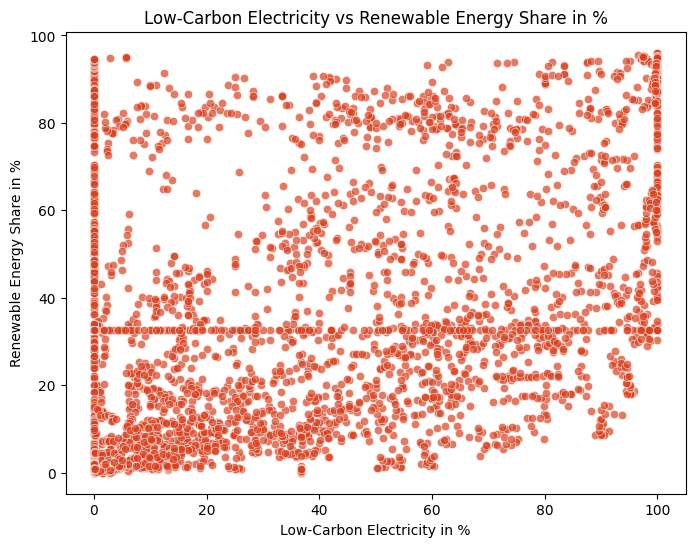

In [63]:
# Low-Carbon Electricity vs Renewable Energy Share
plt.figure(figsize=(8, 6))
sns.scatterplot(x='low-carbon_electricity_(%_electricity)', y='renewable_energy_share_in_the_total_final_energy_consumption_(%)', data=df, alpha=0.7, color='#da401f' )
plt.title('Low-Carbon Electricity vs Renewable Energy Share in %')
plt.xlabel('Low-Carbon Electricity in %')
plt.ylabel('Renewable Energy Share in %')
plt.show()

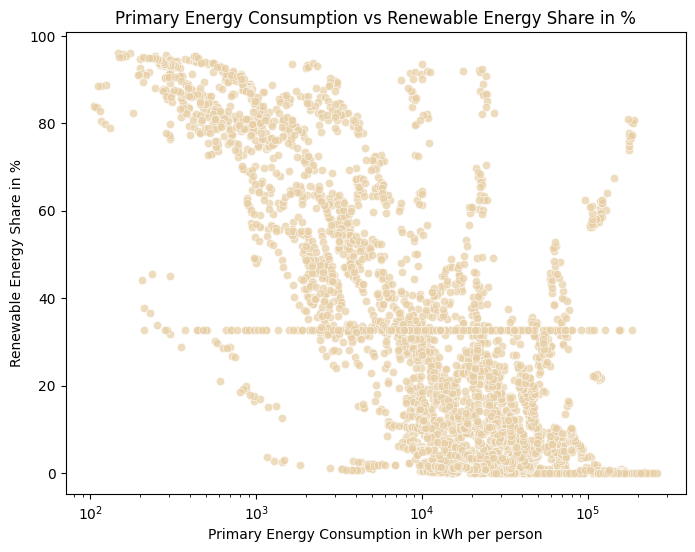

In [64]:
# Primary Energy Consumption vs Renewable Energy Share
plt.figure(figsize=(8, 6))
sns.scatterplot(x='primary_energy_consumption_per_capita_(kwh/person)', y='renewable_energy_share_in_the_total_final_energy_consumption_(%)', data=df, alpha=0.7, color='#e7cea4')
plt.title('Primary Energy Consumption vs Renewable Energy Share in %')
plt.xlabel('Primary Energy Consumption in kWh per person')
plt.ylabel('Renewable Energy Share in %')
plt.xscale('log')  # Log scale for better visualization of variation
plt.show()

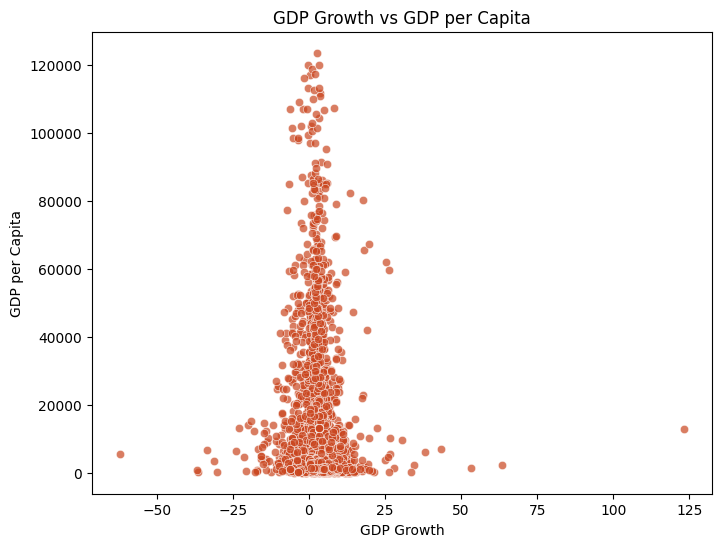

In [65]:
#GDP Growth vs GDP per Capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gdp_growth', y='gdp_per_capita', data=df, alpha=0.7, color='#ca461f' )
plt.title('GDP Growth vs GDP per Capita')
plt.xlabel('GDP Growth')
plt.ylabel('GDP per Capita')
plt.show()

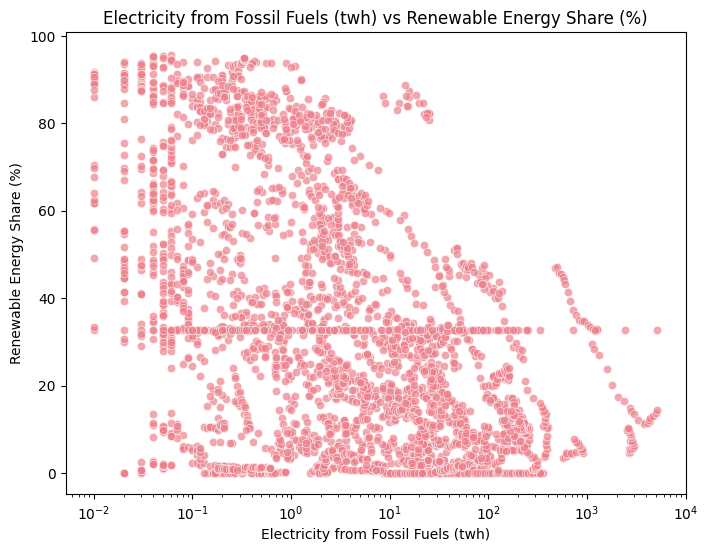

In [66]:
# GDP per Capita vs Renewable Energy Share
plt.figure(figsize=(8, 6))
sns.scatterplot( x='electricity_from_fossil_fuels_(twh)', y='renewable_energy_share_in_the_total_final_energy_consumption_(%)', data=df, alpha=0.7, color='#ed808b')
plt.title('Electricity from Fossil Fuels (twh) vs Renewable Energy Share (%)')
plt.xlabel('Electricity from Fossil Fuels (twh)')
plt.ylabel('Renewable Energy Share (%)')
plt.xscale('log')
plt.show()

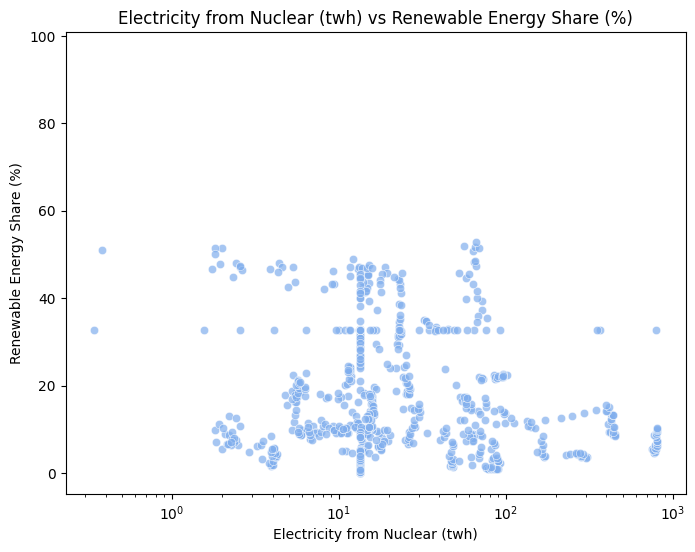

In [67]:
# GDP per Capita vs Renewable Energy Share
plt.figure(figsize=(8, 6))
sns.scatterplot( x='electricity_from_nuclear_(twh)', y='renewable_energy_share_in_the_total_final_energy_consumption_(%)', data=df, alpha=0.7, color='#80aeed')
plt.title('Electricity from Nuclear (twh) vs Renewable Energy Share (%)')
plt.xlabel('Electricity from Nuclear (twh)')
plt.ylabel('Renewable Energy Share (%)')
plt.xscale('log')
plt.show()

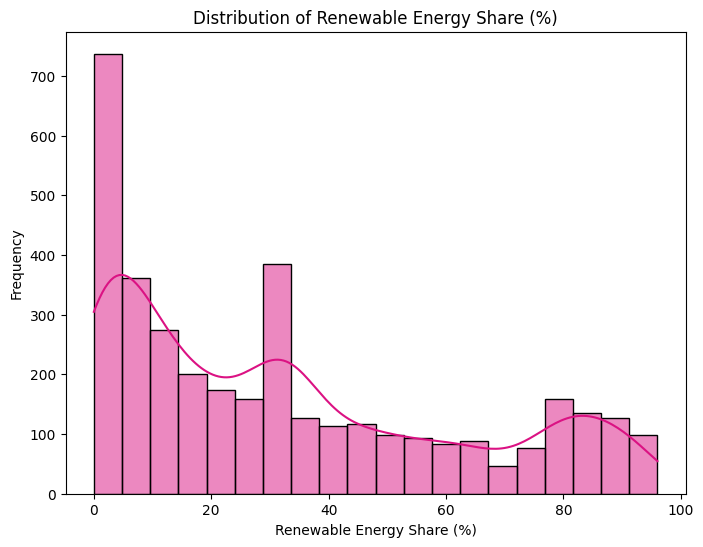

In [68]:
# Visualization 1: Distribution of the Dependent Variable
plt.figure(figsize=(8, 6))
sns.histplot(df['renewable_energy_share_in_the_total_final_energy_consumption_(%)'], kde=True, bins=20, color='#db1283')
plt.title('Distribution of Renewable Energy Share (%)')
plt.xlabel('Renewable Energy Share (%)')
plt.ylabel('Frequency')
plt.show()

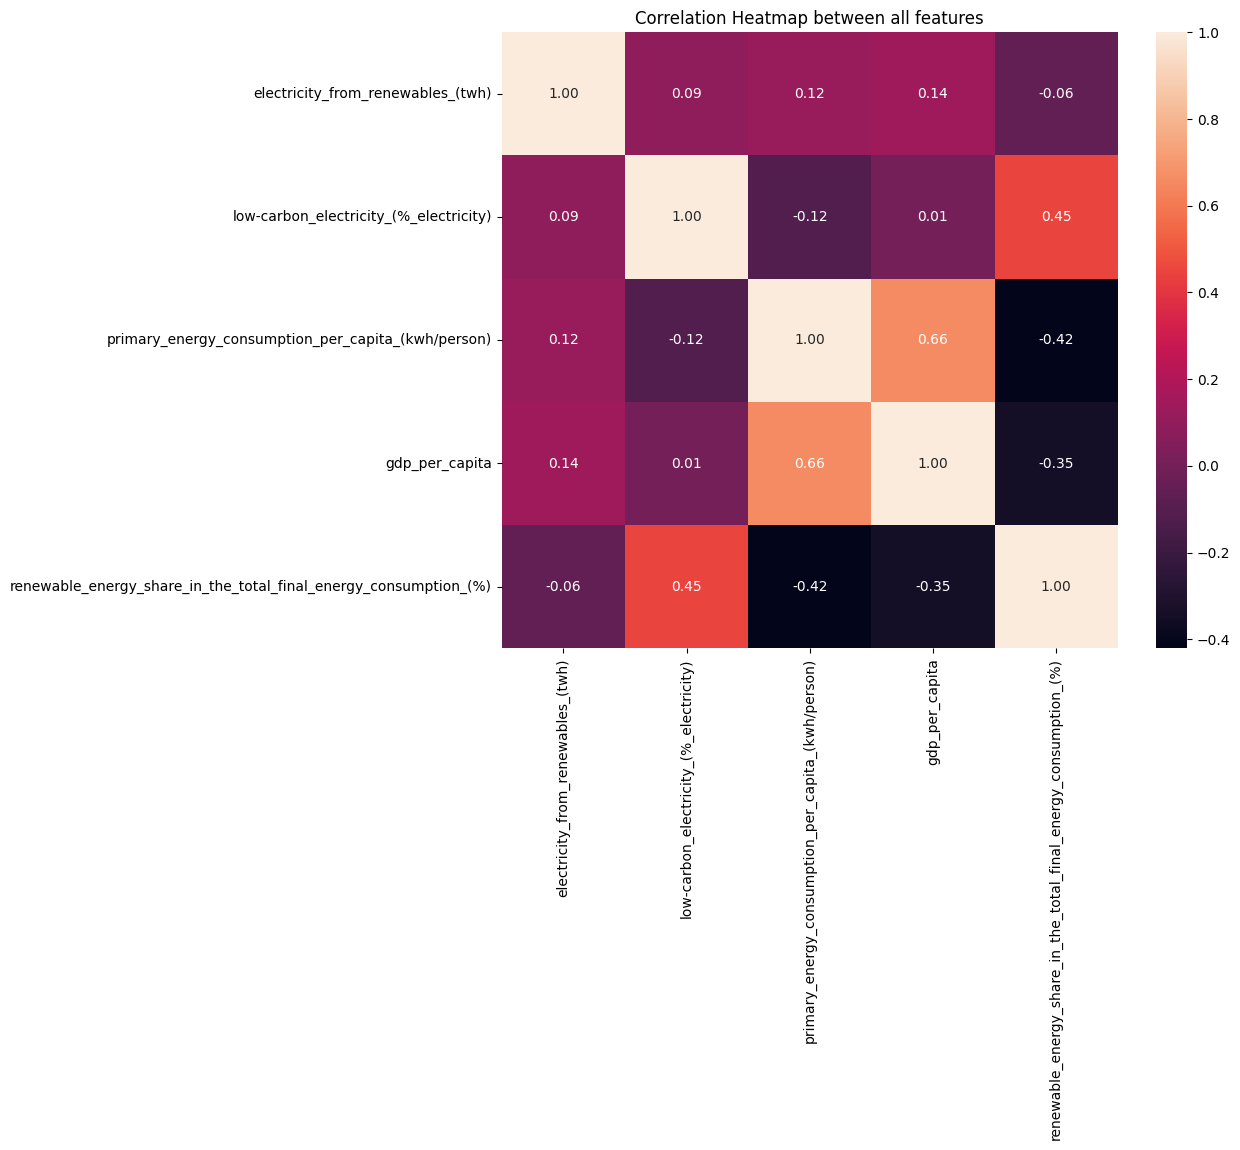

In [69]:
# Correlation Heatmap of Relevant Variables
relevant_columns = [
    'electricity_from_renewables_(twh)',
    'low-carbon_electricity_(%_electricity)',
    'primary_energy_consumption_per_capita_(kwh/person)',
    'gdp_per_capita',
    'renewable_energy_share_in_the_total_final_energy_consumption_(%)'
]
plt.figure(figsize=(10, 8))
correlation_matrix = df[relevant_columns].corr()
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap between all features')
plt.show()

### Starting with Regression Tasks

### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}

$\theta$ is also represented as $\textbf{W}$.

Hence:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [70]:
# Extract relevant data
X = df[['gdp_per_capita', 'primary_energy_consumption_per_capita_(kwh/person)',
          'low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']].to_numpy()
y = df['renewable_energy_share_in_the_total_final_energy_consumption_(%)'].to_numpy()

In [71]:
gdp_per_capita = df['gdp_per_capita'].to_numpy()
primary_energy_consumption_per_capita = df['primary_energy_consumption_per_capita_(kwh/person)'].to_numpy()
low_carbon_electricity = df['low-carbon_electricity_(%_electricity)'].to_numpy()
electricity_from_renewables = df['electricity_from_renewables_(twh)'].to_numpy()
renewable_energy_share_in_the_total_final_energy_consumption = df['renewable_energy_share_in_the_total_final_energy_consumption_(%)'].to_numpy()

In [72]:
if gdp_per_capita.shape == primary_energy_consumption_per_capita.shape == low_carbon_electricity.shape == electricity_from_renewables.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


In [73]:
rows, cols = df.shape
X0 = np.ones(len(gdp_per_capita))
X = np.array([X0, gdp_per_capita, primary_energy_consumption_per_capita]).T
Y = df['renewable_energy_share_in_the_total_final_energy_consumption_(%)'].to_numpy()
W = np.zeros(X.shape[1])
X.shape, Y.shape, W.shape

((3649, 3), (3649,), (3,))

In [74]:
# Train-test split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

## Step-2: Implement a Error/Cost Function.

Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x
    \end{align}



In [75]:
#Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    # Your code here:
    Y_pred = X.dot(W)
    M = len(Y)
    J = 1/(2*M)*(np.sum(np.square(Y_pred - Y)))
    return J

In [76]:
inital_cost = cost_function(X, Y, W)
print(inital_cost)

955.5979828105159


### Step - 3 Optimization Algorithm
Implement GDA from Scratch.

Function to estimate:
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.

In [77]:
# Extract relevant data
X = df[['gdp_per_capita', 'primary_energy_consumption_per_capita_(kwh/person)',
          'low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']].values
y = df['renewable_energy_share_in_the_total_final_energy_consumption_(%)'].values

# Handle missing values (drop rows with NaN for simplicity)
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Normalize features for better optimization performance
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# Add a bias term (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into train and test sets (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent
for epoch in range(epochs):
    predictions = X_train.dot(weights)
    errors = predictions - y_train
    gradient = (1 / len(y_train)) * X_train.T.dot(errors)
    weights -= learning_rate * gradient

# Prediction function
def predict(X, weights):
    return X.dot(weights)


### Step-4: Evaluate a Model.

Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}

In [78]:
# Evaluate on the train and test sets
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

# Metrics for Evaluation

# Model Evaluation - MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Model Evaluation - RMSE
def rmse(y_true, y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  M = len(y_true)
  rmse = np.sqrt(np.sum(1 / M * np.square((y_pred - y_true))))
  return rmse

# Model Evaluation - R2
def r2(y_true, y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rsquared: R Squared Error.
    """
  M = len(y_true)
  mean_y = np.mean(y_true)
  ss_tot = np.sum(np.square((y_true - y_true.mean())))
  ss_res = np.sum(np.square((y_true - y_pred)))
  r2 = 1 - (ss_res/ss_tot)
  return r2

In [79]:
# Calculate metrics and store in relevant variable
test_mse = mse(y_test, y_test_pred)
test_rmse = rmse(y_test, y_test_pred)
test_r2 = r2(y_test, y_test_pred)

In [80]:
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)

Test MSE: 595.7954611634183
Test RMSE: 24.408921753396204
Test R-squared: 0.3709284054184322


Doing the same with SKLearn to ensure that RMSE and R2 values don't diverge too much

In [81]:
# X and Y Values
X = np.array([gdp_per_capita, primary_energy_consumption_per_capita]).T
Y = np.array(renewable_energy_share_in_the_total_final_energy_consumption)

# Model Intialization
linear_regression = LinearRegression()
# Data Fitting
linear_regression = linear_regression.fit(X, Y)
# Y Prediction
Y_pred = linear_regression.predict(X)

# Model Evaluation
linear_rmse = np.sqrt(mean_squared_error(Y, Y_pred))
linear_r2 = linear_regression.score(X, Y)

print("Liner Regression MSE using sklearn: ", mean_squared_error(Y, Y_pred))
print("Liner Regression RMSE using sklearn: ", linear_rmse)
print("Liner Regression R-squared using sklearn: ", linear_r2)

Liner Regression MSE using sklearn:  689.2191656938644
Liner Regression RMSE using sklearn:  26.252983938856634
Liner Regression R-squared using sklearn:  0.18526827779661592


### Ridge Regression

In [82]:
# X and Y Values
X = np.array([gdp_per_capita, primary_energy_consumption_per_capita]).T
Y = np.array(renewable_energy_share_in_the_total_final_energy_consumption)

# Model Initialization with a specified alpha (regularization strength)
ridge_regression = Ridge(alpha=1.0)  # You can adjust the alpha value for experimentation

# Data Fitting
ridge_regression.fit(X, Y)

# Y Prediction
Y_pred_ridge = ridge_regression.predict(X)

# Model Evaluation
ridge_rmse = np.sqrt(mean_squared_error(Y, Y_pred_ridge))
ridge_r2 = ridge_regression.score(X, Y)

print("Ridge Regression MSE using sklearn:", mean_squared_error(Y, Y_pred_ridge))
print("Ridge Regression RMSE using sklearn:", ridge_rmse)
print("Ridge Regression R-squared using sklearn:", ridge_r2)


Ridge Regression MSE using sklearn: 689.2191656938645
Ridge Regression RMSE using sklearn: 26.252983938856637
Ridge Regression R-squared using sklearn: 0.1852682777966158


### Support Vector Regression (SVR)

In [83]:
# X and Y Values
X = np.array([gdp_per_capita, primary_energy_consumption_per_capita]).T
Y = np.array(renewable_energy_share_in_the_total_final_energy_consumption)

# Model Intialization
svr_regressor = SVR()
# Data Fitting
svr_regressor = svr_regressor.fit(X, Y)
# Y Prediction
Y_pred = svr_regressor.predict(X)

# Model Evaluation
svr_rmse = np.sqrt(mean_squared_error(Y, Y_pred))
svr_r2 = svr_regressor.score(X, Y)

print("SVR Regressor MSE using sklearn: ", mean_squared_error(Y, Y_pred))
print("SVR Regressor RMSE using sklearn: ", svr_rmse)
print("SVR Regressor R-squared using sklearn: ", svr_r2)

SVR Regressor MSE using sklearn:  407.105817820794
SVR Regressor RMSE using sklearn:  20.176863428709478
SVR Regressor R-squared using sklearn:  0.5187568184668296


### Random Forest

In [84]:
# X and Y Values
X = np.array([gdp_per_capita, primary_energy_consumption_per_capita]).T
Y = np.array(renewable_energy_share_in_the_total_final_energy_consumption)

# Model Intialization
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
# Data Fitting
random_forest = random_forest.fit(X, Y)
# Y Prediction
Y_pred = random_forest.predict(X)

# Model Evaluation
forest_rmse = np.sqrt(mean_squared_error(Y, Y_pred))
forest_r2 = random_forest.score(X, Y)
forest_mae = mean_absolute_error(Y, Y_pred)

print("Random Forest MSE using sklearn: ", mean_squared_error(Y, Y_pred))
print("Random Forest RMSE using sklearn: ", forest_rmse)
print("Random Forest R-squared using sklearn: ", forest_r2)

Random Forest MSE using sklearn:  35.743494201702674
Random Forest RMSE using sklearn:  5.978586304612711
Random Forest R-squared using sklearn:  0.957747317489057


### Comparision Between the Models based on their Evaluation


In [85]:
if (ridge_r2 > forest_r2) and (ridge_r2 > svr_r2):
    print("Conclusion: Ridge Regression outperformed Random Forest and SVR based on R-squared value.")
elif (forest_r2 > ridge_r2) and (forest_r2 > svr_r2):
    print("Conclusion: Random Forest outperformed Ridge Regression and SVR based on R-squared value.")
elif (svr_r2 > ridge_r2) and (svr_r2 > forest_r2):
    print("Conclusion: SVR outperformed Ridge Regression and Random Forest based on R-squared value.")
else:
    print("There is a tie or close performance between two or more models.")


Conclusion: Random Forest outperformed Ridge Regression and SVR based on R-squared value.


### Hyper-Parameter for Ridge Regressor

In [86]:
# Define hyperparameter grid for Ridge Regression
param_distribution_ridge = {'alpha': [0.005, 0.05, 0.5, 5, 50]}  # Regularization strengths

# Initialize Ridge Regression model
ridge_regressor = Ridge()

# Perform RandomizedSearchCV for a more randomized search approach
random_search_ridge = RandomizedSearchCV(
    estimator=ridge_regressor, param_distributions=param_distribution_ridge,
    n_iter=5, cv=4, scoring='r2', random_state=42
)

# Fit to the training data
random_search_ridge.fit(X_train, y_train)

# Display the best hyperparameters
optimal_params_ridge = random_search_ridge.best_params_
print("Hyperparameters for Ridge Regression:", optimal_params_ridge)


Hyperparameters for Ridge Regression: {'alpha': 50}


### Hyper-Parameter Tuning for SVR

In [87]:

# Define hyperparameter grid for SVR
param_distribution_svr = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'epsilon': [0.01, 0.1, 1],    # Insensitive loss function threshold
    'kernel': ['linear', 'rbf']   # Different kernel functions
}

# Initialize Support Vector Regressor model
svr_regressor = SVR()

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_svr = RandomizedSearchCV(
    estimator=svr_regressor, param_distributions=param_distribution_svr,
    n_iter=6, cv=4, scoring='r2', random_state=42
)

# Fit to the training data
random_search_svr.fit(X_train, y_train)

# Display the best hyperparameters
optimal_params_svr = random_search_svr.best_params_
print("Hyperparameters for Support Vector Regression (SVR):", optimal_params_svr)


Hyperparameters for Support Vector Regression (SVR): {'kernel': 'rbf', 'epsilon': 1, 'C': 1}


### Hyper-Parameter Tuning for Random Forest

In [88]:

# Define hyperparameter grid for Random Forest
param_grid_forest = {
    'n_estimators': [50],  # Number of trees
    'max_depth': [15],  # Maximum depth per tree
    'min_samples_split': [3],  # Minimum samples to split a node
    'min_samples_leaf': [2],  # Minimum samples per leaf node
}

# Initialize Random Forest Regressor
forest_regressor = RandomForestRegressor(random_state=7)

# Perform GridSearchCV for hyperparameter tuning
grid_search_forest = GridSearchCV(
    estimator=forest_regressor, param_grid=param_grid_forest,
    cv=4, scoring='r2'
)

# Fit to the training data
grid_search_forest.fit(X_train, y_train)

# Display the best hyperparameters
optimal_params_forest = grid_search_forest.best_params_
print("Hyperparameters for Random Forest:", optimal_params_forest)

Hyperparameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


In [89]:
# Summarize the best hyperparameters for both models
print("Results of Hyperparameter Tuning:")
print(f"Model 1 (Ridge Regression): Best Parameters: {optimal_params_ridge}")
print(f"Model 2 (Support Vector Regressor): Best Parameters: {optimal_params_svr}")
print(f"Model 3 (Random Forest Regressor): Best Parameters: {optimal_params_forest}")


Results of Hyperparameter Tuning:
Model 1 (Ridge Regression): Best Parameters: {'alpha': 50}
Model 2 (Support Vector Regressor): Best Parameters: {'kernel': 'rbf', 'epsilon': 1, 'C': 1}
Model 3 (Random Forest Regressor): Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


### Feature Selection for Ridge Regressor

In [90]:

# Model: Ridge Regression with optimal hyperparameters from previous step
ridge_model = Ridge(alpha=optimal_params_ridge['alpha'])

# Perform Recursive Feature Elimination (RFE)
rfe_linear = RFE(estimator=ridge_model, n_features_to_select=3)  # Select top 3 features for demonstration
rfe_linear.fit(X_train, y_train)

# Identify selected features
selected_features_linear = rfe_linear.support_  # Boolean mask of selected features
feature_names = ['gdp_per_capita',
                 'primary_energy_consumption_per_capita_(kwh/person)',
                 'low-carbon_electricity_(%_electricity)',
                 'electricity_from_renewables_(twh)']
selected_feature_names_linear = [feature for feature, selected in zip(feature_names, selected_features_linear) if selected]

print("Best features for Linear Regression (Ridge):", selected_feature_names_linear)

Best features for Linear Regression (Ridge): ['primary_energy_consumption_per_capita_(kwh/person)', 'low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']


### Feature Selection for SVR

In [91]:

# Define the SVR model (linear kernel necessary for meaningful feature ranking)
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Perform Recursive Feature Elimination (RFE)
rfe_svr = RFE(estimator=svr_model, n_features_to_select=3)
rfe_svr.fit(X_train, y_train)

# Identify selected features
selected_features_svr = rfe_svr.support_
feature_names = ['gdp_per_capita',
                 'primary_energy_consumption_per_capita_(kwh/person)',
                 'low-carbon_electricity_(%_electricity)',
                 'electricity_from_renewables_(twh)']
selected_feature_names_svr = [feature for feature, selected in zip(feature_names, selected_features_svr) if selected]

print("Best features for Support Vector Regression (SVR):", selected_feature_names_svr)


Best features for Support Vector Regression (SVR): ['primary_energy_consumption_per_capita_(kwh/person)', 'low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']


### Feature Selection for Random Forest

In [92]:

# Model: Random Forest Regressor with optimal hyperparameters from previous step
rf_model = RandomForestRegressor(
    n_estimators = optimal_params_forest['n_estimators'],
    max_depth = optimal_params_forest['max_depth'],
    min_samples_split = optimal_params_forest['min_samples_split'],
    min_samples_leaf = optimal_params_forest['min_samples_leaf'],
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Perform feature selection based on importance scores
sfm_rf = SelectFromModel(rf_model, threshold="median")  # Select features with importance above the median
sfm_rf.fit(X_train, y_train)

# Identify selected features
selected_features_rf = sfm_rf.get_support()  # Boolean mask of selected features
selected_feature_names_rf = [feature for feature, selected in zip(feature_names, selected_features_rf) if selected]

print("Best features for Random Forest Regressor:", selected_feature_names_rf)

Best features for Random Forest Regressor: ['low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']


In [93]:
# Summarize the best features for both models
print("Results of Hyperparameter Tuning:")
print(f"Model 1 (Ridge Regression): Best Features: {selected_feature_names_linear}")
print(f"Model 2 (Support Vector Regressor): Best Features: {selected_feature_names_svr}")
print(f"Model 3 (Random Forest Regressor): Best Features: {selected_feature_names_rf}")


Results of Hyperparameter Tuning:
Model 1 (Ridge Regression): Best Features: ['primary_energy_consumption_per_capita_(kwh/person)', 'low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']
Model 2 (Support Vector Regressor): Best Features: ['primary_energy_consumption_per_capita_(kwh/person)', 'low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']
Model 3 (Random Forest Regressor): Best Features: ['low-carbon_electricity_(%_electricity)', 'electricity_from_renewables_(twh)']


### Final Implementation with optimal features and parameters

In [94]:
# Convert the selected feature names to indices
selected_feature_indices_rf = [feature_names.index(feature) for feature in selected_feature_names_rf]

# Use the indices to select features from X_train and X_test
X_train_best_features = X_train[:, selected_feature_indices_rf]
X_test_best_features = X_test[:, selected_feature_indices_rf]

# Rebuild the Random Forest model with the best hyperparameters
final_rf_model = RandomForestRegressor(
    n_estimators=optimal_params_forest['n_estimators'],
    max_depth=optimal_params_forest['max_depth'],
    min_samples_split=optimal_params_forest['min_samples_split'],
    min_samples_leaf=optimal_params_forest['min_samples_leaf'],
    random_state=42
)

# Train the final model
final_rf_model.fit(X_train_best_features, y_train)

# Predict on the test set
y_test_pred_final = final_rf_model.predict(X_test_best_features)

# Evaluate the final model's performance
mae_final = mean_absolute_error(y_test, y_test_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
r2_final = r2(y_test, y_test_pred_final)


In [95]:
# Display detailed evaluation results for the final model
print("Performance Metrics for the Final Model with Selected Features:")
print(f"Mean Absolute Error (MAE): {mae_final}")
print(f"Root Mean Squared Error (RMSE): {rmse_final}")
print(f"R-squared (R²) Value: {r2_final}")

print("\nDetailed Comparison with the Original Random Forest Model:")
print(f"Original Model Performance Metrics:")
print(f" - Mean Absolute Error (MAE): {forest_mae}")
print(f" - Root Mean Squared Error (RMSE): {forest_rmse}")
print(f" - R-squared (R²) Value: {forest_r2}")

print("\nFinal Model Performance Metrics:")
print(f" - Mean Absolute Error (MAE): {mae_final}")
print(f" - Root Mean Squared Error (RMSE): {rmse_final}")
print(f" - R-squared (R²) Value: {r2_final}")

# Performance comparison and conclusion
if r2_final > forest_r2:
    print("\nConclusion: The final model, with selected features and optimized hyperparameters, "
          "outperformed the original Random Forest model, demonstrating better predictive accuracy.")
elif r2_final == forest_r2:
    print("\nConclusion: The final model performed equally as well as the original Random Forest model.")
else:
    print("\nConclusion: The final model, despite feature selection and hyperparameter optimization, "
          "did not surpass the performance of the original Random Forest model.")


Performance Metrics for the Final Model with Selected Features:
Mean Absolute Error (MAE): 14.22315794306771
Root Mean Squared Error (RMSE): 21.669506695345472
R-squared (R²) Value: 0.5042063793885416

Detailed Comparison with the Original Random Forest Model:
Original Model Performance Metrics:
 - Mean Absolute Error (MAE): 4.05955436226407
 - Root Mean Squared Error (RMSE): 5.978586304612711
 - R-squared (R²) Value: 0.957747317489057

Final Model Performance Metrics:
 - Mean Absolute Error (MAE): 14.22315794306771
 - Root Mean Squared Error (RMSE): 21.669506695345472
 - R-squared (R²) Value: 0.5042063793885416

Conclusion: The final model, despite feature selection and hyperparameter optimization, did not surpass the performance of the original Random Forest model.




---

